### import libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


### Data Gathering

In [3]:
df = pd.read_csv("IMDbMoviesIndia.csv" ,encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movie_data = df
movie_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
movie_data.shape

(15509, 10)

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
movie_data.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


### EDA

In [8]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

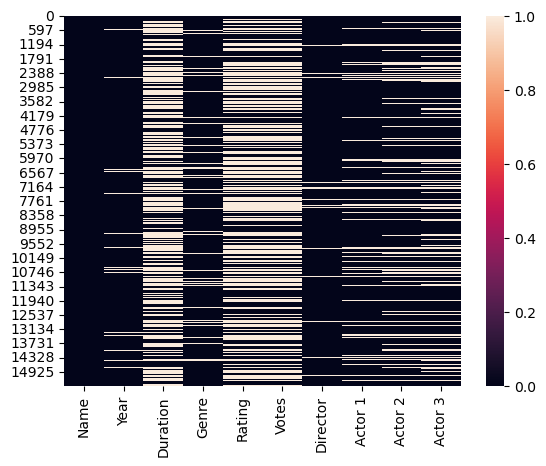

In [9]:
sns.heatmap(movie_data.isnull())

In [10]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


movie_data.dropna(subset = ["rating"], )

In [11]:
movie_data.dropna(subset=["Rating"] , inplace=True)
(round(movie_data.isnull().sum()/movie_data.isnull().count(), 4 )*100).sort_values(ascending = False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [12]:
movie_data.dropna(subset= ['Director', 'Genre','Actor 1','Actor 2','Actor 3' ], inplace= True)
(round(movie_data.isnull().sum()/movie_data.isnull().count(), 4 )*100).sort_values(ascending = False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [13]:
movie_data['Duration']= pd.to_numeric(movie_data['Duration'].str.strip('min'))
movie_data['Duration'].fillna(movie_data['Duration'].mean(),inplace=True)

movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
movie_data.drop_duplicates(inplace=True)
movie_data.shape

(7558, 10)

In [15]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [16]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [17]:
movie_data['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [18]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [19]:
movie_data[['Rating','Duration','Votes']].describe()

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
25%,4.900000,125.000000,18.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
max,10.000000,321.000000,591417.000000


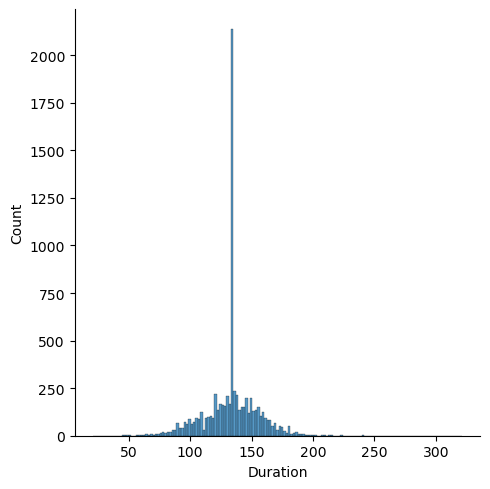

In [20]:
sns.displot(movie_data['Duration'])


<Axes: ylabel='Density'>

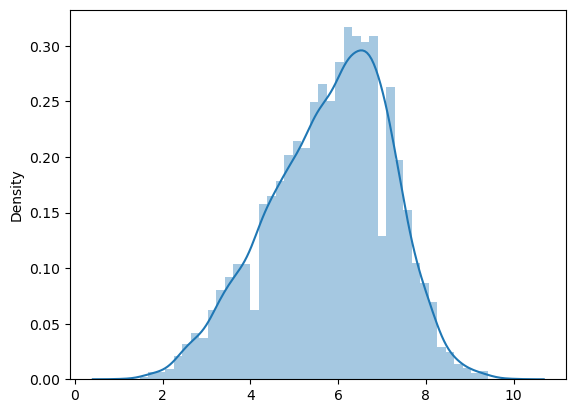

In [21]:
sns.distplot(x=movie_data['Rating'])

<Axes: ylabel='Density'>

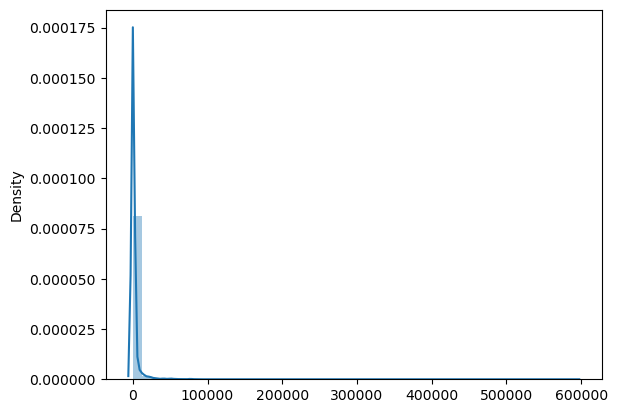

In [22]:
sns.distplot(x=movie_data['Votes'])

<Axes: xlabel='Votes', ylabel='Rating'>

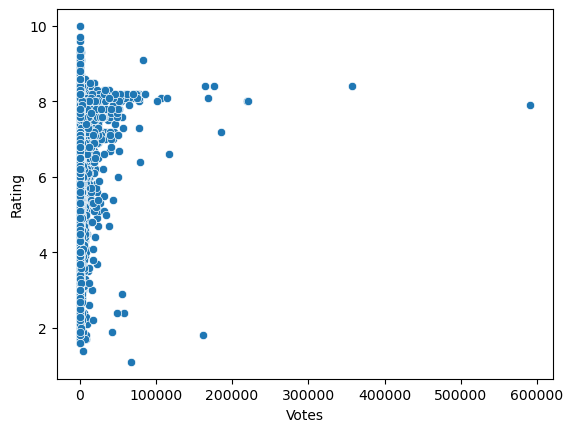

In [23]:
sns.scatterplot(data=movie_data, x="Votes", y="Rating")

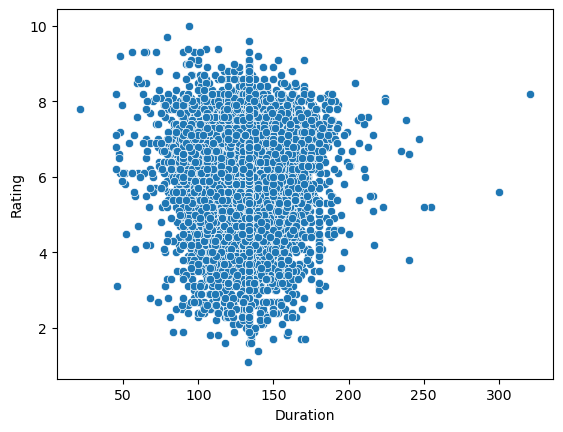

In [24]:
sns.scatterplot(data= movie_data,x="Duration", y="Rating")
plt.show()

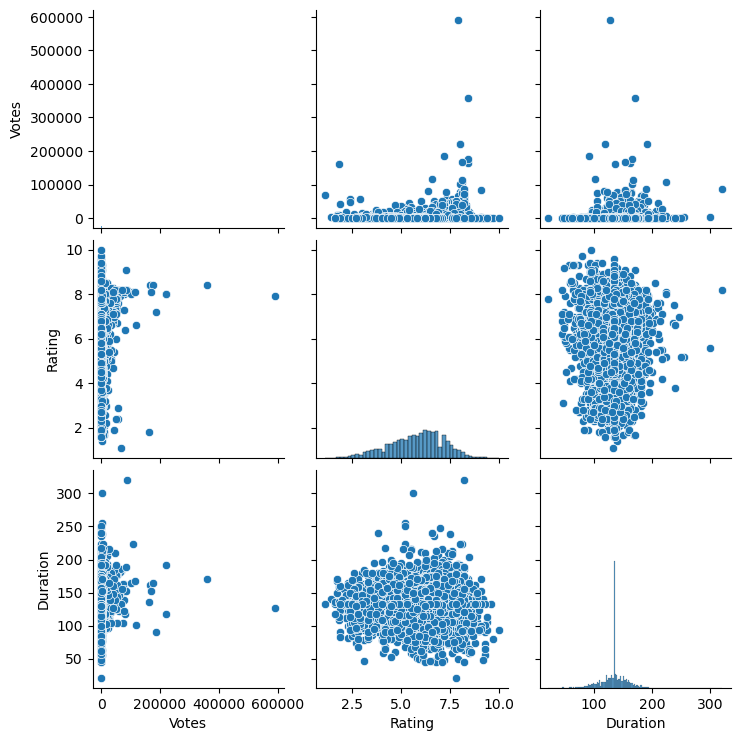

In [25]:
sns.pairplot(movie_data[['Votes', 'Rating', 'Duration']])
plt.show()

In [26]:
df_update = movie_data.drop(['Name'],axis = 1)
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 531.4+ KB


In [27]:
actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [28]:
df_update['actor1_encoded'] = round(df_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
df_update['actor2_encoded'] = round(df_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
df_update['actor3_encoded'] = round(df_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
df_update['director_encoded'] = round(df_update['Director'].map(director_encoding_map['Rating']),1)
df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']),1)

In [29]:
df_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


<Axes: >

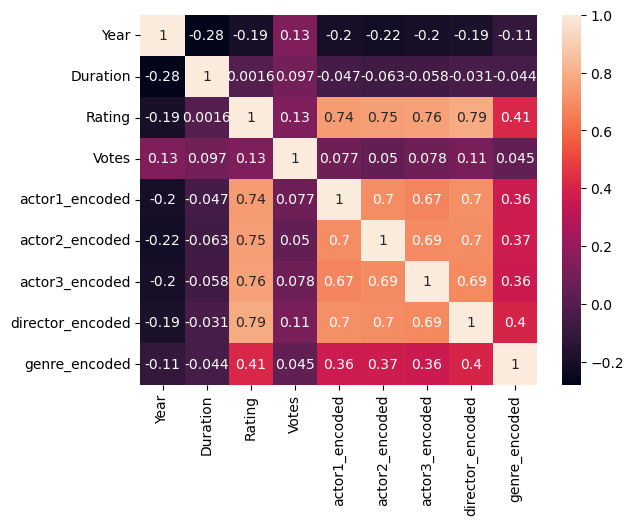

In [30]:
sns.heatmap(df_update.corr(), annot=True)

In [31]:
x = df_update.drop('Rating', axis=1)
y = df_update['Rating']

In [32]:
x.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression

In [34]:
linear_rg = LinearRegression()
linear_rg.fit(x_train, y_train)

LinearRegression()

### model evalution

In [43]:
y_pred = linear_rg.predict(x_test)
y_pred[:10]

array([6.61748431, 5.48518189, 6.32406175, 5.55297899, 6.97332999,
       4.55037453, 5.08706923, 6.87192362, 5.45221302, 7.10862697])

In [39]:
y_test[:10]

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
9928     4.1
7846     5.7
14588    6.9
5735     5.4
3483     6.9
Name: Rating, dtype: float64

### Evalution on testing data

In [55]:
mse = mean_squared_error(y_test,y_pred)
print("mean square error \n", mse)
print("--"*60)
rmse = np.sqrt(mse)
print("root mean square error \n",rmse)
print("--"*60)
mae = mean_absolute_error(y_test,y_pred)
print("mean absulte error\n", mae)
print("--"*60)
r_squared = r2_score(y_test,y_pred)
print("R Squared Value : ",r_squared)

mean square error 
 0.44828860955357486
------------------------------------------------------------------------------------------------------------------------
root mean square error 
 0.6695435830127676
------------------------------------------------------------------------------------------------------------------------
mean absulte error
 0.4983995226829543
------------------------------------------------------------------------------------------------------------------------
R Squared Value :  0.7580529126852417


### evalution on trainging data

In [56]:
y_pred_train = linear_rg.predict(x_train)
y_pred_train[:10]

array([4.92032381, 5.74362313, 6.79758216, 4.73502318, 5.94146203,
       5.76074208, 4.43916149, 6.04855782, 4.28926138, 6.01080528])

In [59]:
y_train[:10]

1399     4.2
10841    6.0
11637    6.3
7918     5.1
4356     6.6
11799    5.7
7666     3.2
5333     5.5
13013    3.6
9353     7.3
Name: Rating, dtype: float64

In [63]:
mse = mean_squared_error(y_train , y_pred_train)
print("mean seuare error \n", mse)
print("--"*60)
rmse = np.sqrt(mse)
print("root mean square error \n", rmse)
print("--"*60)
mae = mean_absolute_error(y_train , y_pred_train)
print("mean absolute error \n", mae)
print("-"*60)
r_squared = r2_score(y_train,y_pred_train)
print("R Squared Value : ",r_squared)

mean seuare error 
 0.4478440717029435
------------------------------------------------------------------------------------------------------------------------
root mean square error 
 0.669211529864021
------------------------------------------------------------------------------------------------------------------------
mean absolute error 
 0.4984086865950037
------------------------------------------------------------
R Squared Value :  0.7613579123839522
